# Семинар 4
## Задача классификации

Сегодня мы:
1. Поговорим о постановке задачи классификации.
2. Обсудим связь между линейной регрессией и задачей классификации.
3. Выведем функцию потерь и обсудим модель логистической регрессии
4. Решим задачу классификации.
5. Обсудим метрики качества классификации:
    - В случае бинарной классификации,
    - В случае многоклассовой классификации.
6. Поговорим о нюансах kNN-классификатора.

## Постановка задачи

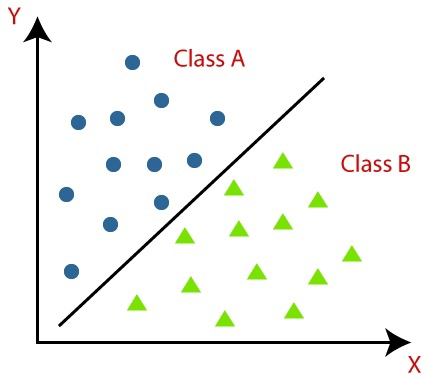

Если бы требовалось описать задачу классификации несколькими словами, то это было бы что-то в духе "нужно наиболее точно разделить объекты по правильным группам", но под этой кажущейся простотой скрывается очень много всего сложного и интересного!

Для полноты картины приведем "строгое определение задачи классификации":

**Классификация** —  *один из разделов машинного обучения, посвященный решению следующей задачи: имеется множество объектов (ситуаций), разделённых некоторым образом на `классы`. Задано конечное множество `объектов`, для которых известно, к каким классам они относятся. Это множество называется `обучающей выборкой`. Классовая принадлежность остальных объектов не известна. Требуется `построить алгоритм`, способный классифицировать произвольный объект из исходного множества.*

Именно задачу классификации мы с вами решали на вводном занятии по машинному обучени. Давайте приведем еще несколько популярных задач классификации:

* Предсказание оттока клиентов/сотрудников на основе их поведения.
* Ранжирование товаров по вероятности покупки их пользователем (подход к реализации рекомендательно системы).
* Классификация клеток ткани на здоровые и опухолевые
* Распознание объектов на фото.
* И многое другое.



---

Будем решать задачу бинарной классификации на данных [Adult](https://archive.ics.uci.edu/ml/datasets/adult), в которой необходимо определить, зарабатывает человек больше 50 тысяч или нет.

В качечестве признаков используются следующие поля:

* **age**;
* **workclass** *(Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.)*;
* **fnlwgt**;
* **education** *(Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool)*;
* **education-num**;
* **marital-status** *(Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)*;
* **occupation** *(Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)*;
* **relationship** *(Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)*;
* **race** *(White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)*;
* **sex**;
* **capital-gain**;
* **capital-loss**;
* **hours-per-week**;
* **native-country**.



In [32]:
# Импортируем библиотеки numpy и pandas для работы с матрицами
import pandas as pd
import numpy as np

In [33]:
# Запишем названия наших столбцов в массив
column_names =  [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'educ-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'salary'
]

In [4]:
# Загрузим данные при помощи фукции read_csv библиотеки pandas по ссылке 
# https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
# дополнительно укажем названия столбцов через атрибус names
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None, names=column_names)
df.drop_duplicates(inplace=True)

for column in df.select_dtypes('object').columns:
  df[column] = df[column].str.strip()

# Посмотрим на наш датасет
df.head()

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Посмотрим есть ли в нашем датасете пропуски и какие типы данных при помощи метода info

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   educ-num        32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  salary          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [6]:
# Кажется, как будто нет, но давайте проверим сколько у нас значений ' ?' в датасете

(df == '?').sum()

age                  0
workclass         1836
fnlwgt               0
education            0
educ-num             0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     582
salary               0
dtype: int64

In [7]:
# В этом датасете именной такой странный символ является символом пропуска. 
# Давайте заменим его на None, например, при помощи метода replace({})

df = df.replace({'?': None})

In [8]:
# Посмотрим еще раз на выход info

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       30701 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   educ-num        32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      30694 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  31955 non-null  object
 14  salary          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [9]:
# Посмотрим на число уникальных значений в каждом из столбцов при помощи метода nunique()
df.nunique()

age                  73
workclass             8
fnlwgt            21648
education            16
educ-num             16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       41
salary                2
dtype: int64

In [10]:
# Со столбцами salary и sex все просто -- это бинарные признаки, у них мы заменим значения на 0 и 1 (например replace)
df = df.replace({'Male': 1, 'Female': 0, '<=50K': 0, '>50K': 1})

# Но у нас есть еще и другие категориальны признаки (посмотреть на них можно например при помощи .select_dtypes(object))
df.select_dtypes(object)

,workclass,education,marital-status,occupation,relationship,race,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Cuba
...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,United-States


In [11]:
# Выберем только те категориальные признаки, в которых меньше 10 уникальных значений, а остальные удалим
# Этот пункт нужен для того, чтобы уменьшить сложность обработки датасетя для запуска бейзлайна
# К нему стоит вернуться, когда вы решите улучшить свой бейзлайн

cat_features = df.select_dtypes(object).nunique()
df.drop(columns=cat_features[cat_features >= 10].index, inplace=True)

In [12]:
# Оставшиеся категориальные признаки закодируем пока что OHE при помощи pd.get_dummies
cat_features_dropped = df.select_dtypes(object).columns

df = pd.get_dummies(
    df,
    columns=cat_features_dropped,
    drop_first=True
)

df

,age,fnlwgt,educ-num,sex,capital-gain,capital-loss,hours-per-week,salary,workclass_Local-gov,workclass_Never-worked,...,marital-status_Widowed,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,77516,13,1,2174,0,40,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,50,83311,13,1,0,0,13,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,215646,9,1,0,0,40,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,53,234721,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,0,40,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,0,38,0,0,0,...,0,0,0,0,0,1,0,0,0,1
32557,40,154374,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,0,0,1
32558,58,151910,9,0,0,0,40,0,0,0,...,1,0,0,0,1,0,0,0,0,1
32559,22,201490,9,1,0,0,20,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [13]:
# Проверим остались ли в нашем датасете пропуски и если да, то на этом этапе удалим их

print(df.isna().sum())

age                                     0
fnlwgt                                  0
educ-num                                0
sex                                     0
capital-gain                            0
capital-loss                            0
hours-per-week                          0
salary                                  0
workclass_Local-gov                     0
workclass_Never-worked                  0
workclass_Private                       0
workclass_Self-emp-inc                  0
workclass_Self-emp-not-inc              0
workclass_State-gov                     0
workclass_Without-pay                   0
marital-status_Married-AF-spouse        0
marital-status_Married-civ-spouse       0
marital-status_Married-spouse-absent    0
marital-status_Never-married            0
marital-status_Separated                0
marital-status_Widowed                  0
relationship_Not-in-family              0
relationship_Other-relative             0
relationship_Own-child            

In [14]:
# Посмотрим на соотношение классов в нашем датасете
print(f"Всего класса 0 в датастее: {(df['salary'] == 0).sum()}, а класса 1: {(df['salary'] == 1).sum()}")

Всего класса 0 в датастее: 24698, а класса 1: 7839


In [15]:
# Импортируем функцию разбиения данных на обучение и тест
from sklearn.model_selection import train_test_split

# Разделим данные на признаки и таргет
X = df.drop(columns='salary')
y = df['salary']

# Разделим данные на обучене и тест (как и раньше со стратификацией по таргету)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=14)

Теперь нам нужна модель, которая бы классифицировала наши объекты, но мы уже знаем про линейную регрессию из прошлого семинара, поэтому давайте воспользуемся этим знанием!

## Связь между линейной регрессией и классификацией

**Интуиция:** У нас уже есть алгоритм, который неплохо находит линейные зависимости (наша линейная регрессия с прошлого семинара).
Может мы сможем его приспособить к тому, чтобы нарисовать линию, которая разделит два класса? Только и нужно, как придумать способ обучать его не "ложиться" вдоль точек, а наоборот делить их поперек.


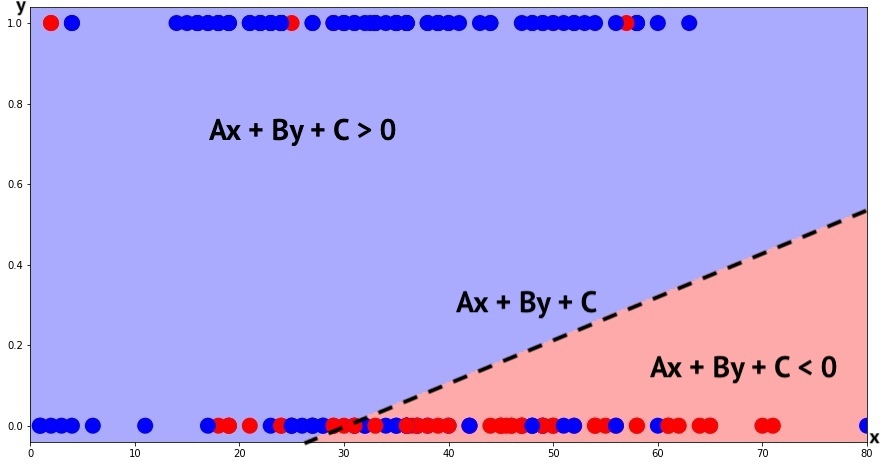

Не трудно убедиться, что точки, которые лежат выше прямой, будут в уравнении прямой давать положительное число, а те, которые ниже прямой, будут давать отрицательные. (мы можем убедиться в этом прикинув параметры прямой на графике и подставить точки, а подробнее об этом в многомернос случае, мы поговорим на отдельном семинаре)

**И тогда предсказанием такого алгоритма будет знак выражения, полученного подстановкой координат в уравнение нашей прямой.**

Отлично, мы разобрались с графической интуицией, давайте теперь посмотрим на задачу не в разрезе `признак-признак`, а в разрезе `признак-таргет` -- нам нужно как-то преобразовать наше линейное отображение. 

Нам нужно из левой картинки, сделать правую, применив какое-нибудь преобразование и тем самым мы сможем обучать обычную линейную регрессию, которая будет пытать аппроксимировать классы 0 и 1, а зачем одним преобразованием мы сможем прекратить аппроксимацию в разделение:

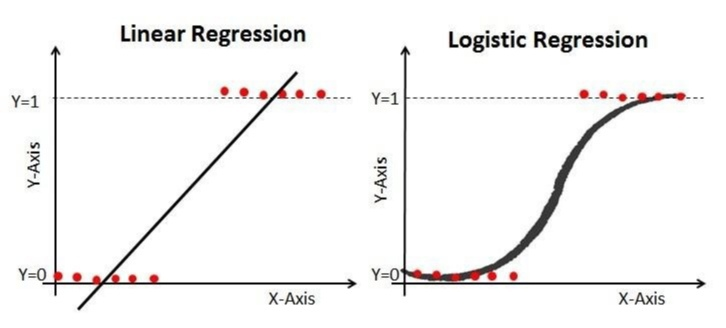

То есть наша задача -- из задачи регрессии $(-\infty, +\infty)$ получить задачу классификации $[0, 1]$.

Однако давайте, как самые последовательные люди, пойдем в этой задаче с конца и научимся делать преобразование $[0, 1] → (-\infty, +\infty)$.

Итак:

1. $[0,1] → (0, +\infty)$ или от вероятности к шансам.
    - Используем следующее преобразование: $odds_+ = \dfrac{p_+}{1-p_+}$, где $p_+ \in [0,1]$ -- вероятность положительного события. 
    - Действительно, когда вероятность положительного события стремится к нулю, то и $odds_+$ стремится к нулю.
    - А когда вероятность тремится к нулю, то $odds_+$ убегает в бесконечность (потому что делим на очень маленькое число)

2. $(0, +\infty) → (-\infty, +\infty)$ или от шансов к логарифму шансов
    - Как понятно из анонса -- все, что нам нужно сделать -- это взять логарифм $odds_+$, который в силу своих свойств будет в нуле аргумента равен $-\infty$, а на бесконечности $\infty$.

3. То есть мы перешли к $(-\infty, +\infty)$, а значит перешли к языку задачи регрессии, нам лишь осталось сказать, что $w^Tx = \ln(odds_+) = \ln\left(\dfrac{p_+}{1-p_+}\right)$, а это уравнение с одной неизвестной.

4. Теперь выразим вероятность положительного события из прошлого пункта:
    $$w^Tx = \ln\left(\frac{p_+}{1-p_+}\right) ⇒ \frac{p_+}{1 - p_+} = \left(\frac{1}{1 - p_+} - 1\right) = \exp(w^Tx) ⇒ 1 - p_+  = \frac{1}{\exp(w^Tx) + 1} ⇒ p_+ = 1 - \frac{1}{\exp(w^Tx) + 1} = \frac{\exp(w^Tx)}{\exp(w^Tx) + 1} = \frac{1}{\exp(-w^Tx) + 1} = \sigma(w^Tx)$$

Итого мы научились строить линейный классификатор используя алгоритм построения линейной регрессиий.

In [16]:
# Импортируем библиотеки для отрисовки
import matplotlib.pyplot as plt
import seaborn as sns

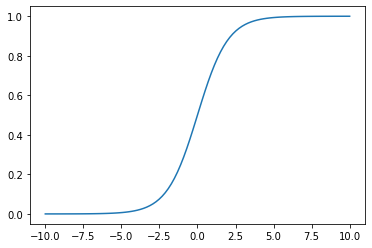

In [17]:
# Преобразование, которые мы получили выше называется сигмоида
# Давайте напишем ее кодом и убедимся, что она выглядит ожидаемым образом

def sigmoida(wx):
    return 1 / (np.exp(-wx) + 1)


x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoida(x))

## Логистическая регрессия и решение задачи

Мы нашли связь между задачей классификации и задачей регрессии, но что если мы пойдем с другой стороны? Давайте посмотрим на задачу классификации с точки зрения теории вероятности, ведь в отличии от регрессии, у нас теперь есть оценки вероятности пренадлежности к классам.

Давайте вспомним, что такое функция правдоподобия (ту самую, которую вы максимизировали в базовом модуле для подбора лучших параметров оценки распределения):

$$L(x, \theta) = \prod_ip_{\theta}(x_i)$$

Только в данном случае в качестве параметров у нас будут выступать параметры модели, а в качестве $x_i$ -- $i$-ый объект выборки.

При этом довольно понятный факт, что задачу классификации можно свести к схеме бернулли (объясните как?), то мы можем переписать функцию правдоподобия следующим образом (далее $w$ -- параметры модели):

$$L(x, w) = \prod_ip_{w}(x_i) = \prod_i p_i^{y_i}(1-p_i)^{1-y_i} → \max$$

Считать произведение неблагодарное дело (получатся маленькие значения и машинная ошибка все попортит) -- прологорифмируем функцию правдоподобие и умножим на минус единицу (потому что в математической оптимизации обычно ставится задача найти минимум функции):

$$-\sum_i \left(y_i\ln(p_i) + (1-y_i)\ln(1-p_i)\right) → \min$$

Выражение выше называется `LogLoss` и именно он явялется функцией потерь в задаче классификации (как `MSE` или `MAE` в задаче регрессии). 

Давайте убедимся, что он минимален, когда мы все врено угадываем и ведет в целом себя ожидаемым образом (когда логарифм становится отрицательным?) на следующем примере:

<center>

$y_{true}$ | P(y = 0) | P(y = 1)
------| ------|----------
1     | 0.9   | 0.1
0     | 0.3   | 0.7
0     | 0.5   | 0.5
1     | 0.04  | 0.96

</center>

**Теперь у нас есть понимание как использовать регрессию, чтобы получать разделение классов и вероятности и функция потерь, чтобы обучать модель. `Такая модель назыается логистической регрессией.`**




In [18]:
logloss = -(np.log(0.1) + np.log(1 - 0.7) + np.log(1 - 0.5) + np.log(0.96))
logloss

4.240527072400181

In [19]:
# Импортируем логистическую регрессию из модуля linear_model библиотеки sklearn
from sklearn.linear_model import LogisticRegression

In [20]:
# Содадим объект класса LogisticRegression с параметрами по умолчанию
model_LR = LogisticRegression()

# Обучим его на обучающем датасете
model_LR.fit(X_train, y_train)

LogisticRegression()

In [21]:
# Получим предсказания и посмотрим на долю правильных ответов:
y_pred_test_LR = model_LR.predict(X_test)

print(f"Доля врено угаданных объектов {(y_pred_test_LR == y_test).sum() / len(y_test)}")

Доля врено угаданных объектов 0.8002458512599877


Мы забыли, что линейные модели чувствительны к порядкам признаков, поэтому нам надо их масштабировать. Для этого есть два самых популярных подхода:

 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))

 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — интервал значений признака.

In [22]:
# Импортируем класс StandardScaler из модуля preprocessing библиотеки sklearn
from sklearn.preprocessing import StandardScaler

In [23]:
# Отмасштабируем наши признаки
# Создадим объект класса StandardScaler

scaler = StandardScaler()

# Сделаем .fit() на обучении
scaler.fit(X_train) # считает среднее по выборке и std 

# .transform() на обучении и тесте (возвращает numpy, поэтому надо самим конвертировать обратно в dataframe с нужными индексами колонками)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [24]:
# Содадим объект класса LogisticRegression с параметрами по умолчанию
model_LR = LogisticRegression()

# Обучим его на обучающем датасете
model_LR.fit(X_train, y_train)

# Получим предсказания и посмотрим на долю правильных ответов:
y_pred_test_LR = model_LR.predict(X_test)
y_pred_train_LR = model_LR.predict(X_train)

print(f"Доля врено угаданных объектов {(y_pred_test_LR == y_test).sum() / len(y_test)}")

Доля врено угаданных объектов 0.8442532267977874


Выросла точность?)

## Метрики: часть 1

С алгоритмом мы разобрались, теперь нужно понять как бы мы могли понять качество работы алгоритма помимо доли верно угаданных ответов.

Важный объект, к которому нам будет удобно ссылкать -- это матрица ошибок или `confusion matrix`, которая содержит в себе число верно и неверно помеченных объекты датасета обоих классов.

Общий вид с обозначениями:

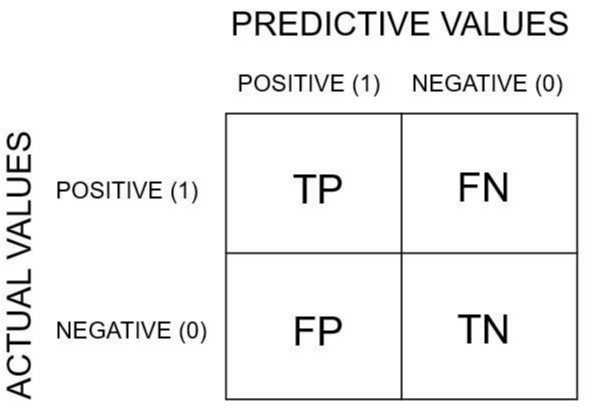

Здесь:
* `TP` - это `True Positive` или верно помеченные объекты класса 1 (положительного класса)
* `TN` - это `True Negative` или верно помеченные объекты класса 0 (отрицательного класса)
* `FP` - это `False Positive` или неверно помеченные объекты класса 0
* `FN` - это `False Negative` или неверно помеченные объекты класса 1

Text(0.5, 41.0, 'Predicted value')

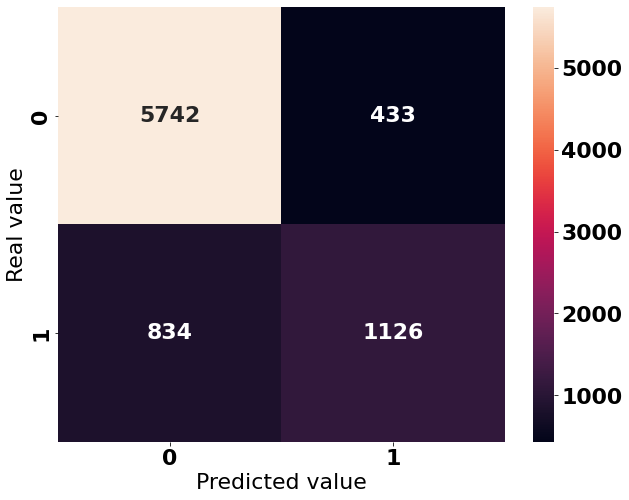

In [25]:
# импортируем функцию confusion_matrix из модуля metrics библиотеки sklearn
from sklearn.metrics import confusion_matrix

# Для нашей задачи матрица ошибок
mp_mtx = confusion_matrix(y_test, y_pred_test_LR)
font = {'family' : 'Calibri', 'weight' : 'bold', 'size'   :22}
plt.rc('font', **font)
fig = plt.figure(figsize=(10,8))
sns.heatmap(mp_mtx, annot=True, fmt="d", 
            xticklabels=df["salary"].unique(), 
            yticklabels=df["salary"].unique())
plt.ylabel("Real value")
plt.xlabel("Predicted value")

### `Accuracy`

Для полноты картины начнем с `Accuracy` или *доли верно угаданных ответов*. Формульно она выглядит следующим образом:

$$Accuracy = \dfrac{TP + TN}{TP + TN + FP + FN}$$

Посчитаем руками для следующей матрицы ошибок:

<center>

_ | True Class 1 | True Class 0
------| ------|----------
Predict Class 1 | 7  | 0
Predict Class 0 | 8  | 435

</center>


In [26]:
(7 + 435) / (7 + 435 + 0 + 8)

0.9822222222222222

In [27]:
# В библиотеки sklearn эта метрика
from sklearn.metrics import accuracy_score

# Посчитаем для нашей модели на обучающем и тестировочном кусках
print(f"TEST:  Accuracy -- {accuracy_score(y_test, y_pred_test_LR)}")
print(f"TRAIN: Accuracy -- {accuracy_score(y_train, y_pred_train_LR)}")

TEST:  Accuracy -- 0.8442532267977874
TRAIN: Accuracy -- 0.8457503483321039


### `Precision`

`Precision` или *точность* -- это *доля верно угаданных элементов позитивного класса среди всех элементов, помеченных позитивными*. Он демонстрирует способность отличать этот класс от других классов.

Формульно она выглядит так:

$$Precision = \frac{TP}{TP + FP}$$

Когда эта метрика максимальна/минимальна? В каких диапазонах могут лежать ее значения?

Посчитаем руками для следующей матрицы ошибок:

<center>

_ | True Class 1 | True Class 0
------| ------|----------
Predict Class 1 | 7  | 0
Predict Class 0 | 8  | 435

</center>

In [28]:
7 / (7 + 0)

1.0

In [29]:
# В библиотеки sklearn эта метрика
from sklearn.metrics import precision_score

# Посчитаем для нашей модели на обучающем и тестировочном кусках
print(f"TEST:  Precision -- {precision_score(y_test, y_pred_test_LR)}")
print(f"TRAIN: Precision -- {precision_score(y_train, y_pred_train_LR)}")

TEST:  Precision -- 0.7222578576010263
TRAIN: Precision -- 0.7282538312108785


### `Recall`

`Recall` или *полнота* -- это *доля верно помеченных объектов позитивного класса, среди всех объектов позитивного класса*. Она демонстрирует способность алгоритма обнаруживать данный класс вообще

Формульно она выглядит так:

$$Recall = \frac{TP}{TP + FN}$$

Когда эта метрика максимальна/минимальна? В каких диапазонах могут лежать ее значения?

Посчитаем руками для следующей матрицы ошибок:

<center>

_ | True Class 1 | True Class 0
------| ------|----------
Predict Class 1 | 7  | 0
Predict Class 0 | 8  | 435

</center>

In [30]:
7 / (7 + 8)

0.4666666666666667

In [31]:
# В библиотеки sklearn эта метрика
from sklearn.metrics import recall_score

# Посчитаем для нашей модели на обучающем и тестировочном кусках
print(f"TEST:  Recall -- {recall_score(y_test, y_pred_test_LR)}")
print(f"TRAIN: Recall -- {recall_score(y_train, y_pred_train_LR)}")

TEST:  Recall -- 0.5744897959183674
TRAIN: Recall -- 0.5739071270624256


Мы видим, что несмотря на то, что accuracy у нашей модели достаточно высокий, precision и recall имеют достаточно низкие значения. Но как нам контролировать качество алгоритма не двумя метриками, а одной? 

Давайте порассуждаем!

## kNN-классификатор

На прошлом семинаре мы погружались в подробности работы метрических алгоритмов (и knn в частоности). Мы говорили, что пространство у нас должно быть однородным и на нем должна быть задана мера расстояния. Все это выполняется также для для knn-классификатора.

Главное отличиние knn-классификатора от knn-регрессора в том, что в качестве аггрегирования соседей берется не среднее арифметическое, а `mode` (оно же самое частое значени). Иными словами объекту сопоставляется доминирующий класс из его окружения.

Однако какое ограничения накладывает такой подход? Можем ли мы смотреть на 1/2/3/4 соседей?

In [34]:
# Импортируем knn классификатор из модуля neighbors библиотеки sklearn
from sklearn.neighbors import KNeighborsClassifier

In [37]:
# Создадим объект класса KNeighborsClassifier с числом соседей равным 3
model_KNN = KNeighborsClassifier(n_neighbors=3)

# Обучим его на обучающем сете 
model_KNN.fit(X_train, y_train)

# Получим предсказания для обучающего и тестового датасета
y_pred_train_KNN = model_KNN.predict(X_train)
y_pred_test_KNN  = model_KNN.predict(X_test)

# Посмотрим accuracy на обучении и на тесте
print(f"TEST:  Accuracy -- {accuracy_score(y_test, y_pred_test_KNN)}")
print(f"TRAIN: Accuracy -- {accuracy_score(y_train, y_pred_train_KNN)}")

TEST:  Accuracy -- 0.8208973570989552
TRAIN: Accuracy -- 0.8976313416933038


## Метрики: часть 2

Вернемся к вопросу, что мы хотим использовать одну метрику, которая бы показывала несмещенную оценку работы модели и желательно была устойчива к несбалансированным выборкам.

### `F1-score`

`F1-score` или *f1-мера* -- это *среднее гармоническое точности и полноты. Оно одинаково учитывает важность точности и полноты и потому показыает четкую картину работы алгоритма.*

Формульно она выглядит следующим образом:

$$F_1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$$

Когда эта метрика максимальна/минимальна? В каких диапазонах могут лежать ее значения?

Посчитаем руками для следующей матрицы ошибок:

<center>

_ | True Class 1 | True Class 0
------| ------|----------
Predict Class 1 | 7  | 0
Predict Class 0 | 8  | 435

</center>

In [38]:
pr = 1.0
rec = 0.47

f1 = 2 * pr * rec / (pr + rec)
f1

0.6394557823129251

In [39]:
# В библиотеки sklearn эта метрика
from sklearn.metrics import f1_score

# Посчитаем для нашей модели knn на обучающем и тестировочном кусках 
print(f"TEST:  F1 -- {f1_score(y_test, y_pred_test_LR)}")
print(f"TRAIN: F1 -- {f1_score(y_train, y_pred_train_LR)}")

TEST:  F1 -- 0.6399545325376529
TRAIN: F1 -- 0.6419330289193304


### `ROC-AUC`

`ROC-AUC` или *площадь под ROC кривой* -- это *мера показывающая насколько точно упорядочены элементы выборки по своим скорам*.

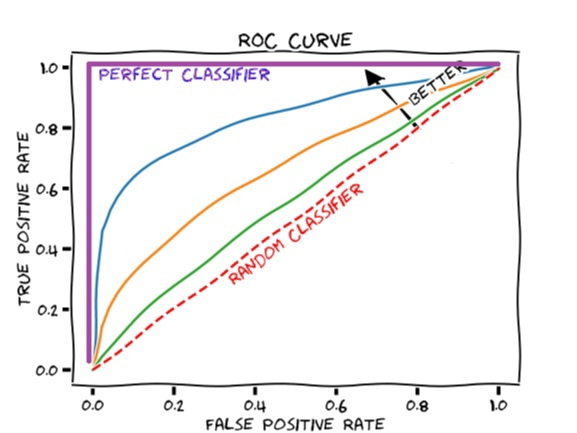

$$ FPR = \frac{FP}{FP + TN}, \quad TPR = \frac{TP}{TP + FN}$$

Алгоритм построения ROC кривой двольно простой:
1. Делае предсказания моделью и получаем вероятности пренадлежности объекта к положительному классу.
2. Делим отрезок [0,1] на оси х на число частей, равное количеству элементов отрицательного класса, ось у на число частей, равное количеству элементов положительного класса.
2. Сортируем объекты по полученным вероятностям по убыванию
3. *Если есть элементы с одинаковыми вероятностями, то группируем их вместе
4. Идем по таблице с сгруппированными вероятностями:
    - Если реальный класс рассматриваемого объекта положительный, то делаем шаг вверх;
    - Если реальный класс рассматриваемого объекта отрицательный, то делаем шаг вправо;
    - Если мы рассматриваем группу объектов, то делаем шаг по диагонали на нужное число клеток вправо и вверх.
5. Получившаяся кривая выходит из [0,0] и приходит в [1,1] (Почему?). Площадь под ней и называется `ROC-AUC`

Когда эта метрика максимальна/минимальна? В каких диапазонах могут лежать ее значения?

Посчитаем руками для следующей матрицы ошибок:

<center>

| True Class | Predict Prob Class 1|
|:------:|:----------:|
| 1  | 0.9|
| 1  | 0.8|
| 0  | 0.7|
| 1  | 0.6|
| 1  | 0.5|
| 0  | 0.4|
| 0  | 0.4|
| 1  | 0.3|
| 0  | 0.1|

</center>

Давайте порассуждаем почему метрика построенная по такому алгоритму достаточно устойчива к несбалансрованным выборкам? Почему она показывает ранжирование объектов?

Если все еще есть вопросы, то можно прочесть [это](https://dyakonov.org/2017/07/28/auc-roc-%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C-%D0%BF%D0%BE%D0%B4-%D0%BA%D1%80%D0%B8%D0%B2%D0%BE%D0%B9-%D0%BE%D1%88%D0%B8%D0%B1%D0%BE%D0%BA/)  и посмотреть [это](https://www.youtube.com/watch?v=V31tK9CgI6c).

In [40]:
# В библиотеки sklearn эта метрика
from sklearn.metrics import roc_auc_score

# Посмотрим эту метрику и для логистической регрессии и для knn (несмотря на то, что мы опустили алгоримт нахождения вероятностей для knn)

# Для ROC-AUC нам нужны вероятности принадлежности положительному классу
# Для получения вероятностей воспользуемся методом predict_proba и нам нужен второй столбец
y_pred_prob_test_LR = model_LR.predict_proba(X_test)[:, 1]
y_pred_prob_test_KNN = model_KNN.predict_proba(X_test)[:, 1]
y_pred_prob_train_LR = model_LR.predict_proba(X_train)[:, 1]
y_pred_prob_train_KNN = model_KNN.predict_proba(X_train)[:, 1]

# Посчитаем для нашей модели knn на обучающем и тестировочном кусках 
print("Logistic Regression")
print(f"TEST:  ROC-AUC -- {roc_auc_score(y_test, y_pred_prob_test_LR)}")
print(f"TRAIN: ROC-AUC -- {roc_auc_score(y_train, y_pred_prob_train_LR)}")
print("kNN")
print(f"TEST:  ROC-AUC -- {roc_auc_score(y_test, y_pred_prob_test_KNN)}")
print(f"TRAIN: ROC-AUC -- {roc_auc_score(y_train, y_pred_prob_train_KNN)}")

Logistic Regression
TEST:  ROC-AUC -- 0.8988787077584072
TRAIN: ROC-AUC -- 0.8999524154617076
kNN
TEST:  ROC-AUC -- 0.8216666942080475
TRAIN: ROC-AUC -- 0.9560845622187122


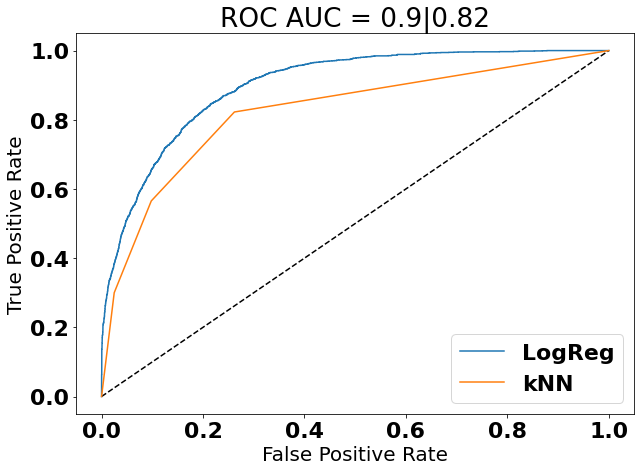

In [41]:
# заодно построим ROC-кривую. Это наглядный способ понять как хорошо работает алгоритм
from sklearn.metrics import roc_curve, auc

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_test_LR)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_test_KNN)

plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label="LogReg")
plt.plot(fpr_knn, tpr_knn, label="kNN")
plt.title(f'ROC AUC = {round(auc(fpr_lr, tpr_lr),2)}|{round(auc(fpr_knn, tpr_knn), 2)}')
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)
plt.legend()
plt.show()

Итого мы решили задачу бинарной классификации двумя алгоритмами и посмотрели все популярные метрики классфикации, но не всегда же у нас будет два класса. Что тогда делать?

## Многоклассовая классификация

Для того, чтобы решать задачу многоклассовой классификации, нам нужен датасет. Чтобы не тратить время на предобработку данных, воспользуемся известным датасетом в ирисами Фишера. Он есть даже в ряде библиотек.

In [42]:
# Загрузим датасет iris из библиотеки seaborn
df_iris = sns.load_dataset("iris")
df_iris = df_iris.sample(n=150)
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
121,5.6,2.8,4.9,2.0,virginica
67,5.8,2.7,4.1,1.0,versicolor
14,5.8,4.0,1.2,0.2,setosa
91,6.1,3.0,4.6,1.4,versicolor
143,6.8,3.2,5.9,2.3,virginica


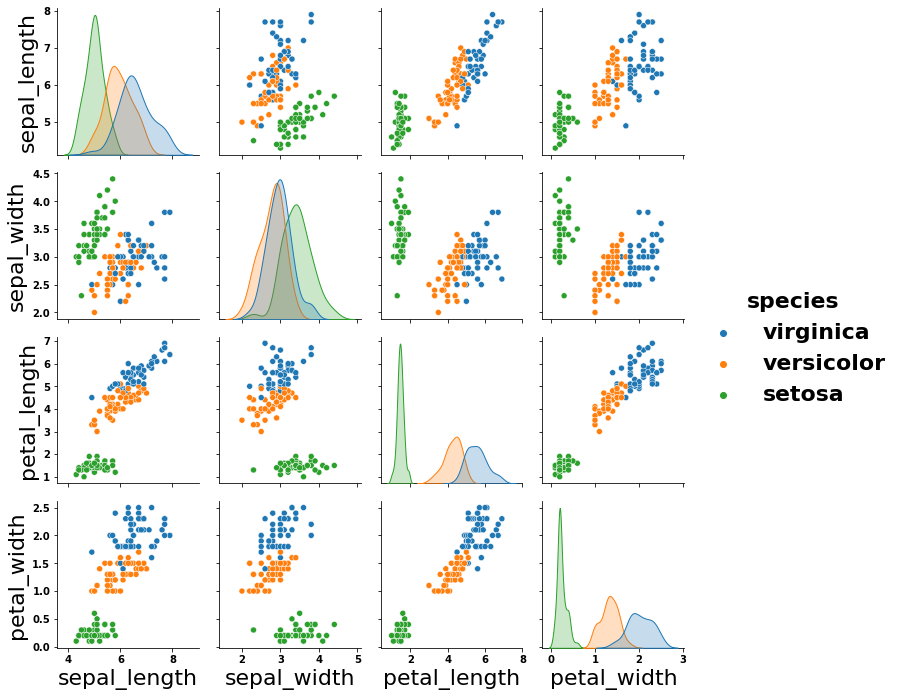

In [43]:
#Построим pairplot
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
sns.pairplot(df_iris, hue="species")

In [44]:
# закодируем категориальные столбцы label-энкодером
from sklearn.preprocessing import LabelEncoder

# Создадим объект класса LabelEncoder
enc = LabelEncoder()

# Обучим его на столбце species
enc.fit(df_iris['species'].values)

# Трансформируем этот столбец при помощи метода transform
df_iris['species'] = enc.transform(df_iris['species'])

In [45]:
# Разделим данные на признаки и таргет
iris_X = df_iris.drop(columns='species')
iris_y = df_iris['species']


# Разделим данные на обучене и тест (как и раньше со стратификацией по таргету) (возьмем test_size=0.9, чтобы были хоть какие-то ошибки)
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_X, iris_y, test_size=0.9, random_state=14)

In [46]:
# Обучим логистическую регрессию
iris_log_reg = LogisticRegression().fit(iris_X_train, iris_y_train)

In [47]:
# Сделаем предсказания
iris_y_log_reg = iris_log_reg.predict(iris_X_test)

iris_y_log_reg_proba = iris_log_reg.predict_proba(iris_X_test)

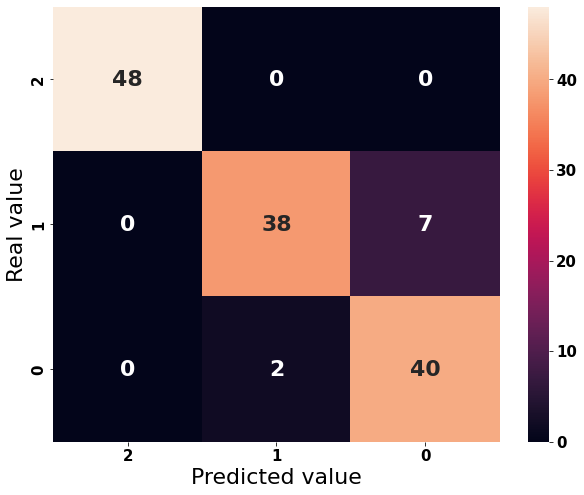

In [48]:
# Построим матрицу ошибок, чтобы понять как справляется наш алгоритм
mp_mtx = confusion_matrix(iris_y_test, iris_y_log_reg)

fig = plt.figure(figsize=(10,8))
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
sns.heatmap(mp_mtx, annot=True, fmt="d", 
            xticklabels=df_iris["species"].unique(), 
            yticklabels=df_iris["species"].unique())
plt.ylabel("Real value")
plt.xlabel("Predicted value")
plt.show()

Нам бы хотелось пользоваться такими же метриками, как и при бинарной классификации, но поскольку у нас большее число классов, нам нужно как-то считать метрики в бинарном случае и потом из усреднять. На этой идее и строятся два основных подхода подсчета:
- `macro` -- подсчет метрик в биноризированном случае и их дальнейшее усреднение
- `micro` -- подсчет TP, TN, FP, FN для каждого класса в бинарном случае, а затем использование их суммы в соответствующих формулах метрик.

Рассчитаем руками macro и micro precision для матрицы ошибок в нашей задаче.

In [49]:
# Проверим себя
print(f"MACRO PRECISION: {...}")
print(f"MICRO PRECISION: {...}")

MACRO PRECISION: Ellipsis
MICRO PRECISION: Ellipsis


Можем посчитать и другие метрики если вы еще живы:)

**Но общая идея использования следующая:**  
При подсчете `Macro Average` мы  теряем информацию о кол-ве наблюдений, поэтому ее лучше `не использовать при дисбалансе` классов.

*Например* у нас есть 4 класса. У первых трех precision равняется 0.9, а у четвертого 0.4. При этом в первых трех классах по 100 наблюдений, а в четвертом 10000. `Macro Average` будет высокой 77, 5%, хотя модель нельзя назвать хорошей. `Micro Average` в таком случае будет значительно ниже.


Но что делать с `ROC-AUC`?

Для него не посчитать `Micro Average` (почему?), остается только `Macro Average`, но даже с ним есть проблемы -- как считать вероятности?

Первый вариант:

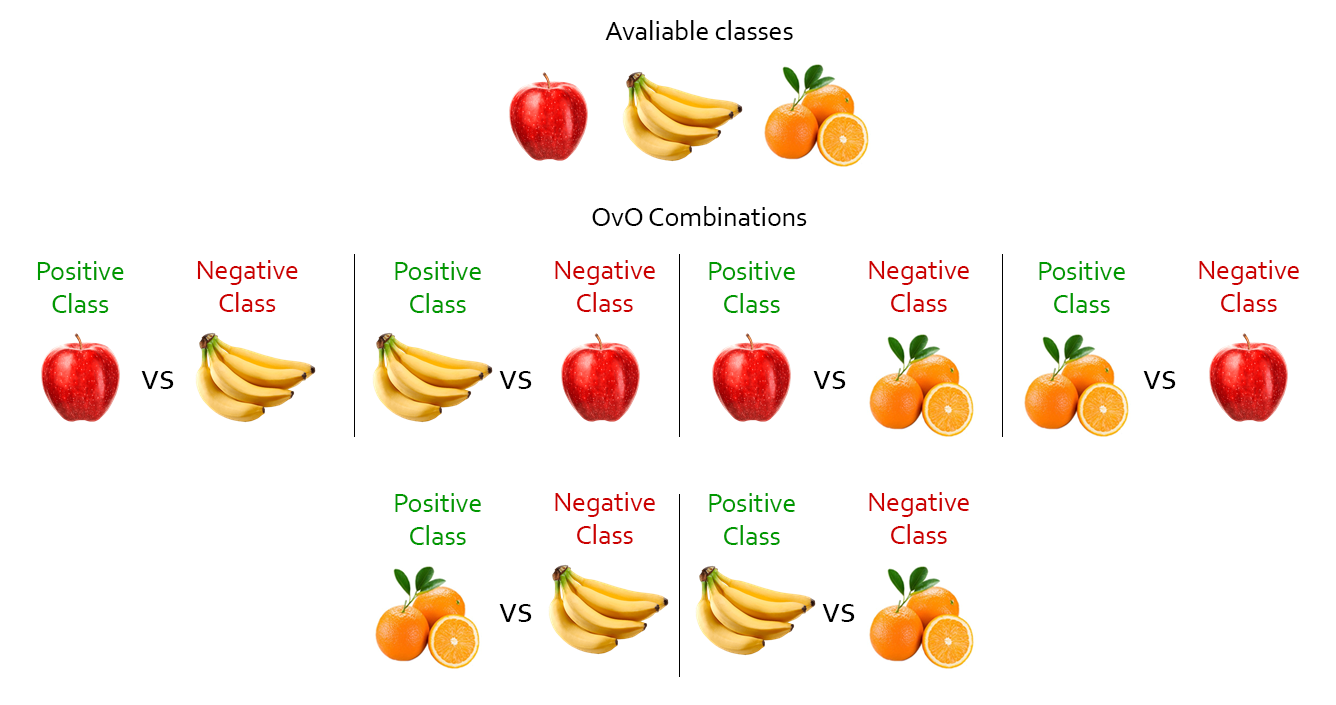

Второй вариант:

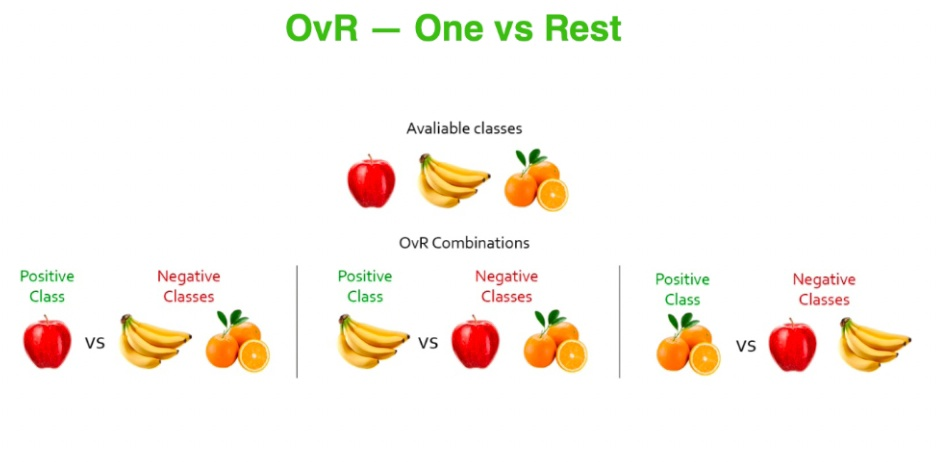

In [ ]:
# Рассчитаем ROC-AUC разными стратегиями

print(f"OvO: {roc_auc_score(iris_y_test, iris_y_log_reg_proba, multi_class='ovo')}")
print(f"OvR: {roc_auc_score(iris_y_test, iris_y_log_reg_proba, multi_class='ovr')}")

Если говорить совсем честно, то у метрик параметр `average` принимает также значения `'weighted'` и `None`. Как вы думаете, что происходит при таком значении параметра?

Вот мы и обсудили все, что нужно знать на первое время по метрикам классификации. Но помните -- у нас была задача и по ней мы только построили бейзлайн. Вернемся к ней и будем улучшать?